 # <center>Laboratory 4<br>Computing methods</center>

 **Instruction:**
 All the exercises from the laboratory must be implemented in [Spyder](https://www.spyder-ide.org/). The report must be sent in [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)


 ***Aim of the lab:***
 The aim of the lab is to familiarize with the numerical methods of solving systems of linear equations. This is the basic task of linear algebra, which we can write as a matrix:

 $\mathbf{Ax} =\mathbf{b}$

 where $\mathbf{A}$ is the matrix of coefficients on the left side of the equation, the vector $\mathbf{x}$ is the vector of variables and the vector $\mathbf{b}$ of the results of the right side of the equation.

 We will use residual to assess the quality of the solution.
 $\mathbf{r} = \mathbf{b}-\mathbf{Ax}$

 ***Exercise 1.***
 Prepare a script or function that allows you to generate random square matrices $\mathbf{A}$ and the vector $\mathbf{b}$  with the given dimensions $m\times m$ and $m\times 1$ respectively integer range.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def generate_matrix(cols, rows, scaler=1):
    return np.random.rand(cols,rows) * scaler
def generate_vector(m, scaler=1):
    return generate_matrix(m, 1, scaler)


 ***Exercise 2.***
 For the matrix and the vector generated in the previous task, find the solution of the system equal to that you create using the function *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* . Using the function *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)* , check the accuracy of the solution obtained (calculate the norm residual), and then determine the matrix conditioning $\mathbf{A}$  using the function *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)* . The answer to the question: whether the range of values and dimensions of the matrix affect the quality of the results obtained?

In [2]:
m = 3
scale = 500
A = generate_matrix(m, m, scale)
b = generate_vector(m, scale)
x = np.linalg.solve(A, b)
r = b - A@x
print("r = {}\n".format(r))
print("cond of A: {}\n".format(np.linalg.cond(A)))
print("norm of r: {}\n".format(np.linalg.norm(r)))



r = [[5.68434189e-14]
 [0.00000000e+00]
 [0.00000000e+00]]

cond of A: 4.289274008283479

norm of r: 5.684341886080802e-14



In [3]:
def generate_result(m, scale_a, scale_b):
    A = generate_matrix(m, m, scale_a)
    b = generate_vector(m, scale_b)
    x = np.linalg.solve(A, b)
    r = b - A@x
    return np.linalg.cond(A), np.linalg.norm(r)

 Let's check how matrix dimension affect to the quality of the results obtained

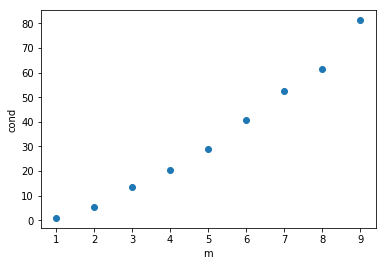

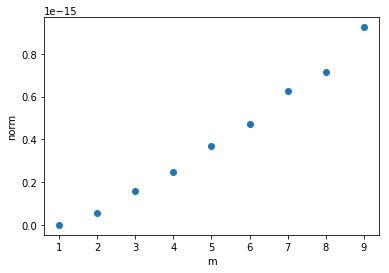

In [4]:
cond_list = []
norm_list = []
m_min = 1
m_max = 10
for m_c in range(m_min, m_max):
    cond_and_norm = [generate_result(m_c,scale_a=1, scale_b=1) for i in range(1000)]
    cond = np.median([cond for cond, norm in cond_and_norm])
    norm = np.median([norm for cond, norm in cond_and_norm])
    cond_list.append(cond)
    norm_list.append(norm)
plt.figure()
plt.xlabel('m')
plt.ylabel('cond')
plt.plot(np.arange(m_min, m_max), cond_list,'o')
plt.show()
plt.figure()
plt.xlabel('m')
plt.ylabel('norm')

plt.plot(np.arange(m_min, m_max), norm_list,'o')
plt.show()

 It looks like the size of the matrix affects both the condition and the norm (linearity function).

 What about the scale?

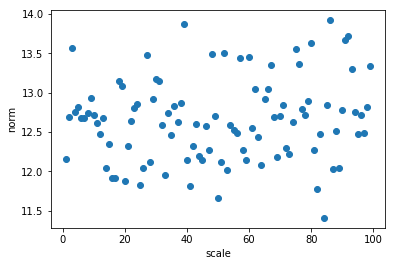

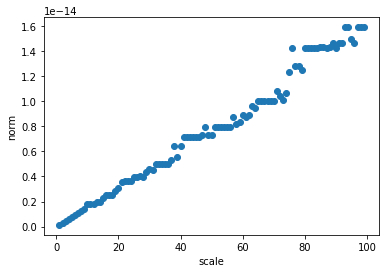

In [5]:
cond_list = []
norm_list = []
scale_min = 1
scale_max = 100

for scale in range(scale_min, scale_max):
    cond_and_norm = [generate_result(m, scale_a=scale, scale_b=scale) for i in range(1000)]
    cond = np.median([cond for cond, norm in cond_and_norm])
    norm = np.median([norm for cond, norm in cond_and_norm])
    cond_list.append(cond)
    norm_list.append(norm)
plt.figure()
plt.xlabel('scale')
plt.ylabel('norm')
plt.plot(np.arange(scale_min, scale_max), cond_list,'o')
plt.show()
plt.figure()
plt.xlabel('scale')
plt.ylabel('norm')
plt.plot(np.arange(scale_min, scale_max), norm_list,'o')
plt.show()

 It looks like the scale of the matrix values (and vector values) affects only for residual norm.

 ***Exercise 3.***
 Using the function *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)* to distribute the matrix $\ mathbf {A}$. Then change the resulting *[singular values](https://en.wikipedia.org/wiki/Singular_value_decomposition)* as follows:
 1. On the non-rising vector generated using the function *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace )* to obtain a spread of 1, 2, 5 and 10 orders of magnitude.
 2. On a non-rising vector, where one value is much larger than the others.
 3. On a non-rising vector, where one value is much smaller than the others.

 In the next step, calculate the matrix $\mathbf{A}$ using the obtained matrix $U$ and $V$. Calculate the value of the conditioning factor. Is it necessary to calculate the matrix to do this?
 For each of $m$, draw a chart of the residues standard of solutions in the function of matrix conditioning.

In [6]:
U, S, V = np.linalg.svd(A)



In [7]:
S



array([734.4322051 , 303.08424481, 171.22529446])

In [8]:
v_log1 =  np.logspace(1, 0.1, m)
v_log2 =  np.logspace(2, 0.1, m)
v_log5 =  np.logspace(5, 0.1, m)
v_log10 =  np.logspace(10, 0.1, m)
v1 = np.array([1000, 2.4, 1.2])
v2 = np.array([1000, 999.3, 1.2])
v_log10



array([1.00000000e+10, 1.12201845e+05, 1.25892541e+00])

In [9]:
def calc_A(s):
    return (U * s) @ V
A_log1 = calc_A(v_log1)
print("cond of A_log1: {}\n".format(np.linalg.cond(A_log1)))

A_log2 = calc_A(v_log2)
print("cond of A_log2: {}\n".format(np.linalg.cond(A_log2)))

A_log5 = calc_A(v_log5)
print("cond of A_log5: {}\n".format(np.linalg.cond(A_log5)))

A_log10 = calc_A(v_log10)
print("cond of A_log10: {}\n".format(np.linalg.cond(A_log10)))

A_v1 = calc_A(v1)
print("cond of A_v1: {}\n".format(np.linalg.cond(A_v1)))

A_v2 = calc_A(v2)
print("cond of A_v2: {}\n".format(np.linalg.cond(A_v2)))


cond of A_log1: 7.943282347242822

cond of A_log2: 79.43282347242798

cond of A_log5: 79432.82347262594

cond of A_log10: 7943287641.85216

cond of A_v1: 833.3333333333278

cond of A_v2: 833.3333333332849



 Is it necessary?
 The condition number (for $l^2$ norm)
 is equal to $\sigma_{max}(A) \over \sigma_{min}(A)$,
 where $\sigma_{max}(A)$ and $\sigma_{min}(A)$ are maximal
 and minimal singular values of A respectively (via wikipedia).
 Therefore instead calculating the matrix A
 it's enought to calculate this values from the created singular vectors.

In [10]:
print("cond of A_log1: {}\n".format(np.max(v_log1)/np.min(v_log1)))
print("cond of A_log2: {}\n".format(np.max(v_log2)/np.min(v_log2)))
print("cond of A_log5: {}\n".format(np.linalg.cond(np.diag(v_log5))))
print("cond of A_log10: {}\n".format(np.max(v_log10)/np.min(v_log10)))
print("cond of A_v1: {}\n".format(np.max(v1)/np.min(v1)))
print("cond of A_v2: {}\n".format(np.max(v2)/np.min(v2)))


cond of A_log1: 7.943282347242815

cond of A_log2: 79.43282347242814

cond of A_log5: 79432.82347242815

cond of A_log10: 7943282347.242815

cond of A_v1: 833.3333333333334

cond of A_v2: 833.3333333333334



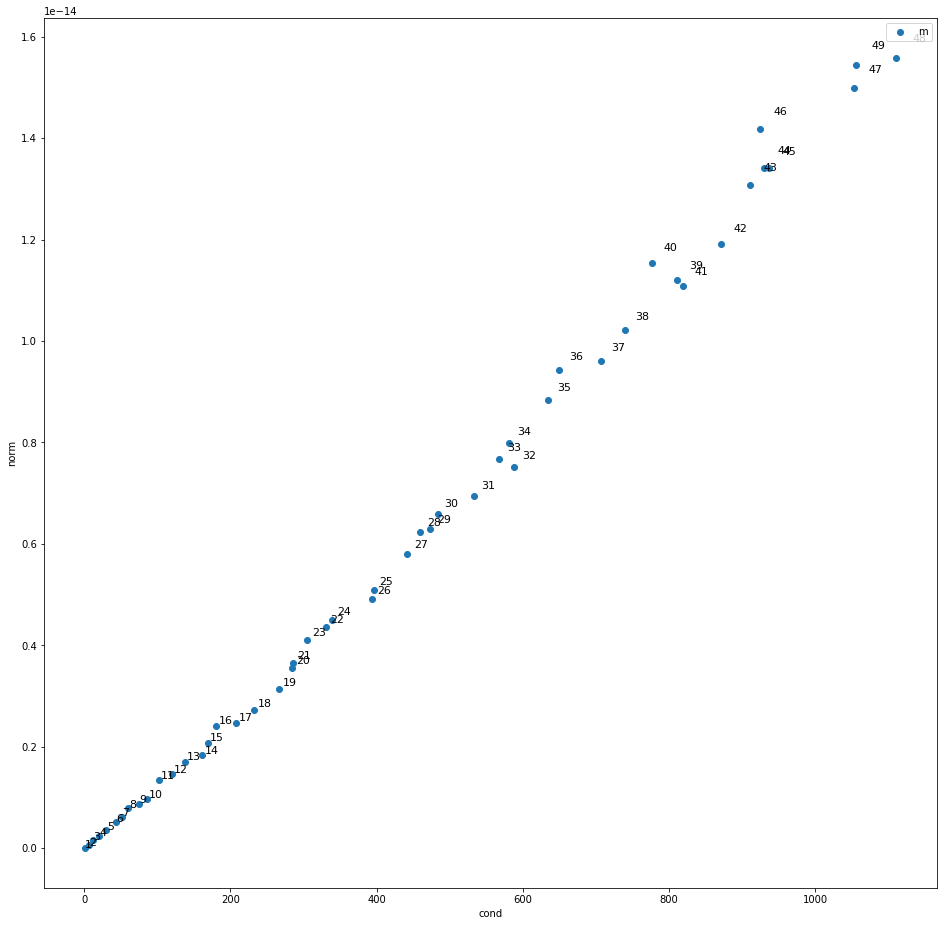

In [15]:
plt.figure(figsize=(16,16))
x_list = []
y_list = []
legend_list = []
for m_c in range(1, 50):
    xy = [generate_result(m_c, scale_a=1, scale_b=1) for i in range(1000)]
    x = np.median([x for x, y in xy])
    y = np.median([y for x, y in xy])
    x_list.append(x)
    y_list.append(y)
    plt.text(x * (1 + 0.02), y * (1 + 0.02) , m_c, fontsize=11)

plt.plot(x_list,y_list,'o')
plt.xlabel('cond')
plt.ylabel('norm')
plt.legend(['m'])
plt.show()

I use median, because the mean is strongly affected by strongly deviated values.
Again, the relationship between this two attributes looks linear.

 Supplementary materials:
 - [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
 - [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
 - [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
 - [NumPy](https://www.numpy.org)
 - [Matplotlib](https://matplotlib.org/)
 - [Anaconda](https://www.anaconda.com/)
 - [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
 - [Learn Python](https://www.learnpython.org/)
 - [Uncle  Google](https://google.pl) i [auntie Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)